# Multiple populations strategy for transfer PRS tutorial

This tutorial show step by step how to run the transprs framework using multiple population strategy to transfer the PRS model from UKBB (large number of samples) and JPN (large number of samples) to Vietnamese (VN) population (small number of samples) 

### Loading library

In [1]:
import transprs as tprs

### Prepare the input data

In the `tutorials/data` folder that download from here: https://drive.google.com/file/d/1ZsbfabvwnssMiji6ECDieg1C7mJNhvYm/view?usp=sharing, you should have:

- Test or target individual genotypes: `test_demo.bed/bim/fam`
- Test phenotype: `test_demo.phenotype`
- Validation individual genotypes: `val_demo.bed/bim/fam`
- Validation phenotype: `validation_demo.phenotype`
- Summary statistic files: `UKBB_height_sumstats.ss` from UKBB, `VN_train_sumstats.ss` from VN and `JPN_height_sumstat.ss` from JPN data

### Reading input data

We create a DataProcessor object that manage all the related data and will be used to process and interactive with PRS methods, validation and visualization

In [2]:
processor_UKBB = tprs.read_input(prefix_test="tutorials/data/test_demo",
                test_phenotype="tutorials/data/test_demo.phenotype",
                sumstats_path="tutorials/data/UKBB_height_sumstats.ss",
                prefix_validation="tutorials/data/val_demo",
                validation_phenotype="tutorials/data/validation_demo.phenotype",
                workdir="workdir_UKBB_tutorial")

Reading the Test genotype...


Mapping files: 100%|██████████████████████████████████████████████████████| 3/3 [00:00<00:00, 82.54it/s]


Reading the Validation genotype...


Mapping files: 100%|██████████████████████████████████████████████████████| 3/3 [00:00<00:00, 91.02it/s]


Phenotype stored in .phenotype
Phenotype stored in .phenotype_val


### Preprocessing

In the preprocessing, we included: cleaning SNPs, flip reverse, compute PCA 

In [3]:
tprs.Preprocessing(processor_UKBB, n_components=6)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

31807 MB RAM detected; reserving 15903 MB for main workspace.
22331 variants loaded from .bim file.
257 people (0 males, 0 females, 257 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 257 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
22331 variants and 257 people pass filters and QC.
Note: No phenotypes present.
Pruned 9950 variants from chromosome 21, leaving 1559.
Pruned 9120 variants from chromosome 22, leaving 1702.
Pruning co

### Running PRS models

We provided a set of common PRS models to use to generate the basic results. They will be combined later.

Current support PRS models:
- P+T or Clumping: `tprs.methods.clumping`
- Double weight: `tprs.methods.double_weight`
- LDpred: `tprs.methods.ldpred`
- LDpred2: `tprs.methods.ldpred2`
- polyfun: `tprs.methods.polyfun`
- SBayesS: `tprs.methods.SBayesS`
- SBayesR: `tprs.methods.SBayesR`
- PRSCSx: `tprs.methods.multipop.prscsx`

In this tutorial, we will only run the P+T/clumping and Double weight methods for each population.

For each model, there are 5 steps:
- 1. Run the method
- 2. Generate PRS for validation data
- 3. Evaluate with the validation data
- 4. Generate PRS for test data
- 5. Evaludate with the test data

#### P+T/clumping model for UKBB

In [4]:
tprs.methods.clumping(processor_UKBB)

tprs.scoring.generate_prs(processor_UKBB,method="clumping")

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_UKBB,method="clumping",validate=False)

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

Clumping is running...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_out.log.
Options in effect:
--bfile workdir_UKBB_tutorial/preprocessed_validation
--clump workdir_UKBB_tutorial/preprocessed_sumstats
--clump-field P
--clump-kb 250
--clump-p1 1
--clump-r2 0.5
--clump-snp-field SNP
--out tmp_out

31807 MB RAM detected; reserving 15903 MB for main workspace.
22331 variants loaded from .bim file.
258 people (0 males, 0 females, 258 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_out.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 258 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
22331 variants and 

#### Double weight model for UKBB

In [5]:
tprs.methods.double_weight(processor_UKBB)

tprs.scoring.generate_prs(processor_UKBB,method="double_weight")

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_UKBB,method="double_weight",validate=False)

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

Double weight method is running...
[1] "Adjusted BETA is done!"
Done Double weight!
The double weight result stores in .adjusted_ss['double_weight']!
--- Done in 0:00:01 ---
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_UKBB_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_UKBB_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

31807 MB RAM detected; reserving 15903 MB for main workspace.
22331 variants loaded from .bim file.
258 people (0 males, 0 females, 258 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 258 founders and 0 nonfounders present.


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_UKBB_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_UKBB_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

31807 MB RAM detected; reserving 15903 MB for main workspace.
22331 variants loaded from .bim file.
257 people (0 males, 0 females, 257 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 257 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
22331 variants and 257 people pass f

### Running PRS models for VN population (change the sumstats)

In [6]:
processor_VN = tprs.read_input(prefix_test="tutorials/data/test_demo",
                test_phenotype="tutorials/data/test_demo.phenotype",
                sumstats_path="tutorials/data/VN_train_sumstats.ss",
                prefix_validation="tutorials/data/val_demo",
                validation_phenotype="tutorials/data/validation_demo.phenotype",
                workdir="workdir_VN_tutorial")

Reading the Test genotype...


Mapping files: 100%|██████████████████████████████████████████████████████| 3/3 [00:00<00:00, 82.00it/s]


Reading the Validation genotype...


Mapping files: 100%|██████████████████████████████████████████████████████| 3/3 [00:00<00:00, 95.77it/s]


Phenotype stored in .phenotype
Phenotype stored in .phenotype_val


In [7]:
tprs.Preprocessing(processor_VN, n_components=6)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

31807 MB RAM detected; reserving 15903 MB for main workspace.
22331 variants loaded from .bim file.
257 people (0 males, 0 females, 257 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 257 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
22331 variants and 257 people pass filters and QC.
Note: No phenotypes present.
Pruned 9950 variants from chromosome 21, leaving 1559.
Pruned 9120 variants from chromosome 22, leaving 1702.
Pruning co

In [8]:
# Run P+T
tprs.methods.clumping(processor_VN)

tprs.scoring.generate_prs(processor_VN,method="clumping")

tprs.metrics.coef_squared_evaluation(processor_VN,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_VN,method="clumping",validate=False)

tprs.metrics.coef_squared_evaluation(processor_VN,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)


Clumping is running...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_out.log.
Options in effect:
--bfile workdir_VN_tutorial/preprocessed_validation
--clump workdir_VN_tutorial/preprocessed_sumstats
--clump-field P
--clump-kb 250
--clump-p1 1
--clump-r2 0.5
--clump-snp-field SNP
--out tmp_out

31807 MB RAM detected; reserving 15903 MB for main workspace.
22331 variants loaded from .bim file.
258 people (0 males, 0 females, 258 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_out.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 258 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
22331 variants and 258 

In [9]:
# Run double weight
tprs.methods.double_weight(processor_VN)

tprs.scoring.generate_prs(processor_VN,method="double_weight")

tprs.metrics.coef_squared_evaluation(processor_VN,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_VN,method="double_weight",validate=False)

tprs.metrics.coef_squared_evaluation(processor_VN,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

Double weight method is running...
[1] "Adjusted BETA is done!"
Done Double weight!
The double weight result stores in .adjusted_ss['double_weight']!
--- Done in 0:00:01 ---
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

31807 MB RAM detected; reserving 15903 MB for main workspace.
22331 variants loaded from .bim file.
258 people (0 males, 0 females, 258 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 258 founders and 0 nonfounders present.
Calc

### Running PRS models for JPN population (change the sumstats)

In [10]:
processor_JPN = tprs.read_input(prefix_test="tutorials/data/test_demo",
                test_phenotype="tutorials/data/test_demo.phenotype",
                sumstats_path="tutorials/data/JPN_height_sumstat.ss",
                prefix_validation="tutorials/data/val_demo",
                validation_phenotype="tutorials/data/validation_demo.phenotype",
                workdir="workdir_JPN_tutorial")

Reading the Test genotype...


Mapping files: 100%|██████████████████████████████████████████████████████| 3/3 [00:00<00:00, 78.33it/s]


Reading the Validation genotype...


Mapping files: 100%|██████████████████████████████████████████████████████| 3/3 [00:00<00:00, 94.32it/s]


Phenotype stored in .phenotype
Phenotype stored in .phenotype_val


In [11]:
tprs.Preprocessing(processor_JPN, n_components=6)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

31807 MB RAM detected; reserving 15903 MB for main workspace.
22331 variants loaded from .bim file.
257 people (0 males, 0 females, 257 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 257 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
22331 variants and 257 people pass filters and QC.
Note: No phenotypes present.
Pruned 9950 variants from chromosome 21, leaving 1559.
Pruned 9120 variants from chromosome 22, leaving 1702.
Pruning co

In [12]:
# Run P+T
tprs.methods.clumping(processor_JPN)

tprs.scoring.generate_prs(processor_JPN,method="clumping")

tprs.metrics.coef_squared_evaluation(processor_JPN,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_JPN,method="clumping",validate=False)

tprs.metrics.coef_squared_evaluation(processor_JPN,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)


Clumping is running...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_out.log.
Options in effect:
--bfile workdir_JPN_tutorial/preprocessed_validation
--clump workdir_JPN_tutorial/preprocessed_sumstats
--clump-field P
--clump-kb 250
--clump-p1 1
--clump-r2 0.5
--clump-snp-field SNP
--out tmp_out

31807 MB RAM detected; reserving 15903 MB for main workspace.
22331 variants loaded from .bim file.
258 people (0 males, 0 females, 258 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_out.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 258 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
22331 variants and 25

In [13]:
# Run double weight
tprs.methods.double_weight(processor_JPN)

tprs.scoring.generate_prs(processor_JPN,method="double_weight")

tprs.metrics.coef_squared_evaluation(processor_JPN,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_JPN,method="double_weight",validate=False)

tprs.metrics.coef_squared_evaluation(processor_JPN,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

Double weight method is running...
[1] "Adjusted BETA is done!"
Done Double weight!
The double weight result stores in .adjusted_ss['double_weight']!
--- Done in 0:00:01 ---
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_JPN_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_JPN_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

31807 MB RAM detected; reserving 15903 MB for main workspace.
22331 variants loaded from .bim file.
258 people (0 males, 0 females, 258 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 258 founders and 0 nonfounders present.
Ca

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_JPN_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_JPN_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

31807 MB RAM detected; reserving 15903 MB for main workspace.
22331 variants loaded from .bim file.
257 people (0 males, 0 females, 257 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 257 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
22331 variants and 257 people pass fil

### Combine populations with multiple populations strategy

In this strategy, we used combination of all methods for each combination. It will be easy to extend the number of population and methods.

The suffix number is the order of population in the list.

In [14]:
# Set a list of all DataProcessor objects
processors = [processor_UKBB,processor_VN,processor_JPN]

In [15]:
# Set a list of methods user wants to combine
methods = ["clumping","double_weight"]

In [16]:
# Perform the combination with weighting method as linear regression
tprs.Combine_multipop_methods(processors, methods=methods,
                                      trait_col="Height", 
                                      prs_col="SCORESUM",
                                      use_col="BETA",
                                      metric="coef_squared")

Estimating mixing weights...
[ 0.13633192  0.27084535 -0.41189508]
The clumping0+clumping1+clumping2 result stores in .prs_test['clumping0+clumping1+clumping2']!
--- Done in 0:00:00 ---
The best fit p-value is combine
The best fit result is stored in processor.prs_test['clumping0+clumping1+clumping2']['best_fit']
The best fit result is stored in processor.performance['clumping0+clumping1+clumping2']['coef_squared']
Estimating mixing weights...
[ 0.2648689   0.29401207 -0.60476407]
The clumping0+clumping1+double_weight2 result stores in .prs_test['clumping0+clumping1+double_weight2']!
--- Done in 0:00:00 ---
The best fit p-value is combine
The best fit result is stored in processor.prs_test['clumping0+clumping1+double_weight2']['best_fit']
The best fit result is stored in processor.performance['clumping0+clumping1+double_weight2']['coef_squared']
Estimating mixing weights...
[ 0.1421087   0.42390399 -0.40535884]
The clumping0+double_weight1+clumping2 result stores in .prs_test['clumping

### Visualization

User can use `bar_plot` or `box_plot` to visualize the data

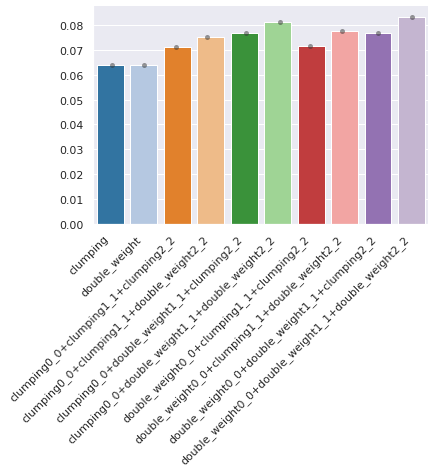

In [17]:
tprs.visualization.visualize_performance(processor_UKBB,metric="coef_squared",plot_type="bar_plot",cmap="tab20")

### Snippet codes for other methods

#### PRSCSx

Follow the PRSCSx github page https://github.com/getian107/PRScsx to download LD reference and put the path folder to `ldref_dir`

In [ ]:
tprs.methods.multipop.prscsx(processors,["EUR","EAS","EAS"],use_col="BETA",ldref_dir="LD_REF_PATH",N=["300000","800","165056"])

# Result of PRSCSx store in the first DataProcessor in the `processors` list
tprs.scoring.generate_prs(processor_UKBB,method="PRSCSx")

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="PRSCSx",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_UKBB,method="PRSCSx",validate=False)

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="PRSCSx",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

#### PolyFun

In [ ]:
tprs.methods.polyfun(processor_UKBB, N=300000)

tprs.scoring.generate_prs(processor_UKBB,method="polyfun")

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="polyfun",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_UKBB,method="polyfun",validate=False)

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="polyfun",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

#### SBayesR

Access https://cnsgenomics.com/software/gctb/#LDmatrices to download LD reference and put the path folder to `ldm`

In [ ]:
tprs.methods.SBayesR(processor_UKBB, ldm="LD_REF_PATH/ukb10k.mldm" )

tprs.scoring.generate_prs(processor_UKBB,method="SBayesR")

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="SBayesR",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_UKBB,method="SBayesR",validate=False)

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="SBayesR",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)
    

#### SBayesS

Access https://cnsgenomics.com/software/gctb/#LDmatrices to download LD reference and put the path folder to `ldm`

In [ ]:
tprs.methods.SBayesS(processor_UKBB, ldm="LD_REF_PATH/ukb10k.mldm")

tprs.scoring.generate_prs(processor_UKBB,method="SBayesS")

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="SBayesS",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_UKBB,method="SBayesS",validate=False)

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="SBayesS",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

#### Ldpred

Follow the github page to prepare the reference for LD: https://github.com/bvilhjal/ldpred

In [ ]:
tprs.methods.ldpred(processor_UKBB,
                    reference="PATH_TO_REF_GENOTYPE",
                    N=754,
                    h2=0.5,
                    fraction_causal=0.02,
                    ldf="REF")

tprs.scoring.generate_prs(processor_UKBB,method="ldpred")

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="ldpred",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_UKBB,method="ldpred",validate=False)

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="ldpred",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

#### Ldpred2

Follow the homepage to prepare LD reference and the map file: https://privefl.github.io/bigsnpr/articles/LDpred2.html

In [ ]:
tprs.methods.ldpred2(processor_UKBB, 
                     ldref_path = "LD_REF_PATH", 
                     map_file = "PATH_TO_MAP/map.rds" )

tprs.scoring.generate_prs(processor_UKBB,method="ldpred2")

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="ldpred2",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_UKBB,method="ldpred2",validate=False)

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="ldpred2",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)